<a href="https://colab.research.google.com/github/bivar/numerico/blob/master/numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo Numérico - Atividade 2 

Rebeca Bivar - 2016002387

Ciência da Computação


## Glossário
  - f_linha: derivada da função f(x)
  - phi: φ, função de iteração do met. das secantes
  - cp: critério de parada ε

## Referências
 - [Tutorial Newton-Raphsen e Secante](https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/)
 - [Tutorial Algoritmo Método da Secante](https://www.ime.unicamp.br/~valle/Teaching/MS211/Aula10.pdf)
 - [Tutorial derivadas com Python](https://phkonzen.github.io/notas/MiniCalcPy/3-derivada.html)

## Imports
Bibliotecas utilizadas

In [ ]:
import numpy as np
import math
from sympy import *
import matplotlib.pyplot as plt
from prettytable import PrettyTable as pt


## Visualização Gráfica


In [ ]:
# A função é: f(x) = -ke^x - 2x, onde k = 387 
var('x,y')
f = Lambda(x, (-387*math.e**x - 3*x))

# Plotando a equação para definir o intervalo através da análise gráfica 
def plot_graph(y):
  x = np.array(range(-10, 20))
  #y = (-387*math.e**x - 3*x)
  plt.plot(x,y)
  plt.grid(alpha=.6,linestyle='--')
  plt.show()


#plot_graph() 


## Método da bisseção

### Calculo do num de iterações

In [ ]:
# O intervalo é [-4, -3.5]
a = -4
b = -3.5

# Criterio de parada
cp = 10**-4

def num_iter(a, b):
  n = (np.log(b - a) - np.log(cp))/np.log(2)
  return math.ceil(n)

n = num_iter(a,b)
print("Numero de iterações = ", n)

Numero de iterações =  13


### Algoritmo

In [ ]:
# Dados
# O intervalo é [-4, -3.5]
a = -4
b = -3.5
var('x,y')
f = Lambda(x, (-387*math.e**x - 3*x))
n = 13
# Criterio de parada
cp = 10**-4

# Vetores para plotar na tabela
a_tab = []
b_tab = []
xi_tab = []
fxi_tab = []

# Metodo da bisseção de refinamento da raíz aproximada
def bissecao(f, a, b, cp, n):
  i = 1
  fa = f(a)
  # Enquanto o numero de iterações for menor do que o num max calculado 
  while (i <= n):
    a_tab.append(a)
    b_tab.append(b)
    # Calcula um xi
    xi = a + (b-a)/2
    print("xi = ", xi)
    xi_tab.append(xi)
    # Aplica na equação
    fxi = f(xi)
    fxi_tab.append(fxi)
    # Se f(xi) = 0 ou o criterio de parada for atingido, pare
    if ((fxi ==0) or ((b-a)/2 < cp)):
      print("A raíz aproximada é", xi, ", dentro do intervalo [", a, ",", b, "]"
            , "com", i, "iterações")
      return xi
    # Se não, continue
    i = i+1
    if (fa * fxi > 0):
      print("novo a = ", xi)
      a = xi
      fa = fxi
    else:
      print("novo b = ", xi)
      b = xi

  raise NameError("Numero max de iter. excedido")

xi = bissecao(f,a,b,cp,n)

xi =  -3.75
novo a =  -3.75
xi =  -3.625
novo a =  -3.625
xi =  -3.5625
novo b =  -3.5625
xi =  -3.59375
novo a =  -3.59375
xi =  -3.578125
novo b =  -3.578125
xi =  -3.5859375
novo a =  -3.5859375
xi =  -3.58203125
novo b =  -3.58203125
xi =  -3.583984375
novo a =  -3.583984375
xi =  -3.5830078125
novo b =  -3.5830078125
xi =  -3.58349609375
novo a =  -3.58349609375
xi =  -3.583251953125
novo b =  -3.583251953125
xi =  -3.5833740234375
novo b =  -3.5833740234375
xi =  -3.58343505859375
A raíz aproximada é -3.58343505859375 , dentro do intervalo [ -3.58349609375 , -3.5833740234375 ] com 13 iterações


## Método de Newton-Raphson

In [ ]:
# Calculo da derivada
def calc_dif(f):
  return diff(f(x),x)

# Dados
# O intervalo é [-4, -3.5]
a = -4
b = -3.5
var('x,y')
f = Lambda(x, (-387*math.e**x - 3*x))
n = 13
f_linha = calc_dif(f)
f_linha = Lambda(x, f_linha)
x0 = -3
# Criterio de parada
cp = 10**-4
# Escolhendo um valor para iterações (não é o num max de iterações)
n = 50

# Vetores para a tabela
xi_n_tab = []
fxi_n_tab = []
f_l_x_tab = []

def newton_raphson(f, f_linha, x0, cp, n):
  xi = x0
  # Loop de iterações
  for count in range(0, n):
    fxi = float(f(xi))
    print("F(xn) = ", fxi)
    # Checando se atingiu o critério de parada:
    # sendo ele f(xi) < epsilon
    if(abs(fxi) < cp):
      print("xn final = ", xi, "foi encontrado com ", count, "iterações")
      print("Temos que", fxi, "<", cp)
      fxi_n_tab.append(fxi)
      f_l_x_tab.append(f_linha_xi)
      xi_n_tab.append(xi)
      return xi
    f_linha_xi = float(f_linha(xi))
    print("F'(xn) = ", f_linha_xi)
    if(f_linha_xi == 0):
      print("Não há derivada. Não há solução")
      return None
    # Aplica a iteração de Newton-Raphson
    xi = float(xi - (fxi/f_linha_xi))
    print("xn = ", xi)
    fxi_n_tab.append(fxi)
    f_l_x_tab.append(f_linha_xi)
    xi_n_tab.append(xi)
  print("Aumente o num de iterações, não foi possível encontrar raíz com este")
  return None

xi = newton_raphson(f,f_linha, x0, cp, n)

F(xn) =  -10.267595458363349
F'(xn) =  -22.26759545836335
xn =  -3.4611003230035333
F(xn) =  -1.7666407140416034
F'(xn) =  -15.149941683052203
xn =  -3.577710719993899
F(xn) =  -0.07948786784538875
F'(xn) =  -13.812620027827085
xn =  -3.5834654477490426
F(xn) =  -0.00017869723337149424
F'(xn) =  -13.7505750404805
xn =  -3.5834784433679783
F(xn) =  -9.07807162775498e-10
xn final =  -3.5834784433679783 foi encontrado com  4 iterações
Temos que -9.07807162775498e-10 < 0.0001


## Método da Secante

In [ ]:
# Dados
# O intervalo é [-4, -3.5]
a = -4
b = -3.5
var('x,y')
f = Lambda(x, (-387*math.e**x - 3*x))
# Usando um 'n' aleatorio para iterações
n = 50
# Criterio de parada
cp = 10**-4

# Vetores para tabelas
a_n_tab = []
b_n_tab = []
phi_tab = []
f_phi_tab = []

def secante(f, a, b, n, cp):
  a_n = a
  b_n = b
  for count in range(1,n+1):
    phi = float(a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)))
    f_phi = f(phi) 
    a_n_tab.append(a_n)
    b_n_tab.append(b_n)
    phi_tab.append(phi)
    f_phi_tab.append(f_phi)
    # Checando se encontrou uma raíz exata ou se 
    # a distância entre o intervalo é menor que o 
    # critério de parada
    if((f_phi == 0) or (np.abs((phi - b_n)/b_n) < cp)):
      print("A raíz encontrada é: ", phi)
      print("O método levou ", count, "iterações")
      a_n_tab.append(a_n)
      b_n_tab.append(b_n)
      phi_tab.append(phi)
      f_phi_tab.append(f_phi)
      return phi
    # Se não encontrou ainda, atualizo os valores de
    # a e b
    else:
      a_n = b_n
      b_n = phi    
      print("a_n = ", a_n, "|| b_n = ", b_n)
  print("Aumente o num de iterações, não foi possível encontrar raíz com este")
  return None

sec = secante(f, a, b, n, cp)

a_n =  -3.5 || b_n =  -3.597273010819637
a_n =  -3.597273010819637 || b_n =  -3.5839267143750004
a_n =  -3.5839267143750004 || b_n =  -3.583476024175555
A raíz encontrada é:  -3.5834784438579477
O método levou  4 iterações


## Tabelas

### Tabela Bisseção

In [ ]:
bissec_tab = pt()
bissec_tab.padding_width = 1
bissec_tab.add_column("a", a_tab)
bissec_tab.add_column("b", b_tab)
bissec_tab.add_column("xi", xi_tab)
bissec_tab.add_column("f(xi)", fxi_tab)

print(bissec_tab.get_string(title= "Metodo da Bisseção"))
#print(bissec_tab.get_html_string())


+----------------+------------------+-------------------+-----------------------+
|       a        |        b         |         xi        |         f(xi)         |
+----------------+------------------+-------------------+-----------------------+
|       -4       |       -3.5       |       -3.75       |    2.14863235372447   |
|     -3.75      |       -3.5       |       -3.625      |   0.561799330830425   |
|     -3.625     |       -3.5       |      -3.5625      |   -0.290844966038973  |
|     -3.625     |     -3.5625      |      -3.59375     |   0.140673199368957   |
|    -3.59375    |     -3.5625      |     -3.578125     |  -0.0737665032816306  |
|    -3.59375    |    -3.578125     |     -3.5859375    |   0.0337806211889315  |
|   -3.5859375   |    -3.578125     |    -3.58203125    |  -0.0199108028456454  |
|   -3.5859375   |   -3.58203125    |    -3.583984375   |  0.00695540363487090  |
|  -3.583984375  |   -3.58203125    |   -3.5830078125   |  -0.00647257098482790 |
|  -3.583984375 

### Tabela Newton

In [ ]:
newton_tab = pt()
newton_tab.padding_width = 1
newton_tab.add_column("xi", xi_n_tab)
newton_tab.add_column("f(xi)", fxi_n_tab)
newton_tab.add_column("f'(xi)", f_l_x_tab)

print(newton_tab)
#print(newton_tab.get_html_string())


+-------------------+-----------------------+--------------------+
|         xi        |         f(xi)         |       f'(xi)       |
+-------------------+-----------------------+--------------------+
| 5.944134078212291 |         -160.0        |      -2864.0       |
| 5.944592360951292 |   1.3344034007277514  | -2911.747022451508 |
| 5.944592391731779 | 8.961295316112228e-05 | -2911.355939277775 |
| 5.944592391731779 | 3.637978807091713e-12 | -2911.355939277775 |
+-------------------+-----------------------+--------------------+


### Tabela Secante

In [ ]:
sec_tab = pt()
sec_tab.padding_width = 1
sec_tab.add_column("xk", a_n_tab)
sec_tab.add_column("xk+1", b_n_tab)
sec_tab.add_column("phi", phi_tab)
sec_tab.add_column("f(phi)", f_phi_tab)

print(sec_tab)
#print(sec_tab.get_html_string())

+-------------------+-------------------+-------------------+---------------------+
|         xk        |        xk+1       |        phi        |        f(phi)       |
+-------------------+-------------------+-------------------+---------------------+
|         5         |        7.5        | 6.186239620403321 |  -678.492127733065  |
|        7.5        | 6.186239620403321 | 5.865882540200262 |   231.792075935282  |
| 6.186239620403321 | 5.865882540200262 | 5.947457319111715 |  -8.33732090615376  |
| 5.865882540200262 | 5.947457319111715 | 5.944625033191793 | -0.0950304529942514 |
| 5.947457319111715 | 5.944625033191793 | 5.944592378019604 | 3.99210221075919e-5 |
| 5.947457319111715 | 5.944625033191793 | 5.944592378019604 | 3.99210221075919e-5 |
+-------------------+-------------------+-------------------+---------------------+


## Questão 1

## Questão 2


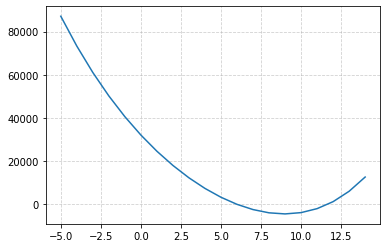

In [ ]:
var('x,y')
f = Lambda(y, (y**4 - 16*y**3 +500*y**2 - 8000*y + 32000))

# Plotando a equação para definir o intervalo através da análise gráfica 
def plot_graph():
  x = np.array(range(-5, 15))
  y = (x**4 - 16*x**3 +500*x**2 - 8000*x + 32000)
  plt.plot(x,y)
  plt.grid(alpha=.6,linestyle='--')
  plt.show()


plot_graph() 

In [ ]:

# Dados
# O intervalo é [5, 7.5]
a = 5
b = 7.5
var('x,y')
f = Lambda(x, (x**4 - 16*x**3 +500*x**2 - 8000*x + 32000))
f_linha = calc_dif(f)
f_linha = Lambda(x, f_linha)
x0 = 6
# Criterio de parada
cp = 10**-5
# Escolhendo um valor para iterações (não é o num max de iterações)
n = 150

# Vetores para a tabela
xi_n_tab = []
fxi_n_tab = []
f_l_x_tab = []

# Calculando o y aproximado pelo metodo de newton
y_aprox = newton_raphson(f, f_linha, x0, cp, n)

F(xn) =  -160.0
F'(xn) =  -2864.0
xn =  5.944134078212291
F(xn) =  1.3344034007277514
F'(xn) =  -2911.747022451508
xn =  5.944592360951292
F(xn) =  8.961295316112228e-05
F'(xn) =  -2911.355939277775
xn =  5.944592391731779
F(xn) =  3.637978807091713e-12
xn final =  5.944592391731779 foi encontrado com  3 iterações
Temos que 3.637978807091713e-12 < 1e-05


In [ ]:
# Dados
# O intervalo é [-4, -3.5]
a = 5
b = 7.5
var('x,y')
f = Lambda(x, (x**4 - 16*x**3 +500*x**2 - 8000*x + 32000))
# Usando um 'n' aleatorio para iterações
n = 150
# Criterio de parada
cp = 10**-5

# Vetores para tabelas
a_n_tab = []
b_n_tab = []
phi_tab = []
f_phi_tab = []

# Calculando o y aproximado pelo metodo da secante
y_aprox_sec = secante(f,a,b,n,cp)

a_n =  7.5 || b_n =  6.186239620403321
a_n =  6.186239620403321 || b_n =  5.865882540200262
a_n =  5.865882540200262 || b_n =  5.947457319111715
a_n =  5.947457319111715 || b_n =  5.944625033191793
A raíz encontrada é:  5.944592378019604
O método levou  5 iterações


In [ ]:
# Calcular largura da rua 
x_new = sqrt(400 - (y_aprox**2))
x_sec = sqrt(400 - (y_aprox_sec**2))

print("A largura da rua pelo método de newton é de ", x_new, "m")
print("A largura da rua pelo método das secantes é de ", x_sec, "m")

A largura da rua pelo método de newton é de  19.0961205823634 m
A largura da rua pelo método das secantes é de  19.0961205866320 m
